# DSCI 503 - Project 03

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
In the next cell I will load the data, then show the basic shape and general statistics associated with the diamonds dataset.

In [2]:
diamonds = pd.read_csv("diamonds.txt", sep="\t")
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


First we will determine the size and shape of the dataset.

In [3]:
print(diamonds.shape)

(53940, 10)


Now we will inspect the distribution of the columns in diamonds.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
In the next cell I will use filtering and sorting techniques to view the five most expensive diamonds.

In [5]:
diamonds.loc[:, ["price", "carat", "cut", "color", "clarity"]].\
    sort_values(by="price", ascending=False).\
    head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


In the next cell I will use filtering and sorting techniques to view the five least expensive diamonds.

In [6]:
diamonds.loc[:, ["price", "carat", "cut", "color", "clarity"]].\
    sort_values(by="price", ascending=True).\
    head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


I will now view information about the five largest diamonds in the dataset, with an ideal cut.

In [7]:
diamonds.loc[:, ["price", "carat", "cut", "color", "clarity"]
                ][diamonds["cut"] == "Ideal"].\
                sort_values(by="carat", ascending=False).\
                head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


In [8]:
diamonds.loc[:, ["price", "carat", "cut", "color", "clarity"]
            ][diamonds["cut"] == "Fair"].\
            sort_values(by="carat", ascending=False).\
            head(5)
            

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
I will now be creating lists to specify the order of each of the three categorical variables.  They will be arranged from worst to best.

In [9]:
clarity_levels = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1"]
cut_levels = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_levels = [ "J", "I", "H", "G", "F", "E", "D"]


In th next cell we will inform Pandas of the correct orders in
which we want it to value the data.

In [10]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)


We will now create a list of named colors to be used in later visualizations. 

In [11]:
# 7 colors
clarity_pal = ["dimgrey", "lightcoral", "saddlebrown", "darkorange", "yellow", "forestgreen", "aqua"] 
# 6 colors
color_pal = ["crimson", "deepskyblue", "slateblue", "slategrey", "seagreen", "gold"]
# 7 colors
cut_pal = ["darkgrey", "firebrick", "chocolate", "greenyellow", "cyan", "steelblue", "darkviolet"]

## Part 4: Displaying Counts for Categorical Variables
In the next cell we will be counting the number of diamonds with each cut.

In [12]:
diamonds.loc[:, "cut"].value_counts().sort_index().head()

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

We will now count the number of diamonds for each level by color.

In [13]:
diamonds.loc[:, "color"].value_counts().sort_index().head()

J     2808
I     5422
H     8304
G    11292
F     9542
Name: color, dtype: int64

We will now count the number of diamonds for each level by color.

In [14]:
diamonds.loc[:, "clarity"].value_counts().sort_index().head()

I1       741
SI2     9194
SI1    13065
VS2    12258
VS1     8171
Name: clarity, dtype: int64

## Part 5: Scatterplots of Price Against Carat
In the next cell we will see a scatter plot showing the price and carat values for our dataset.

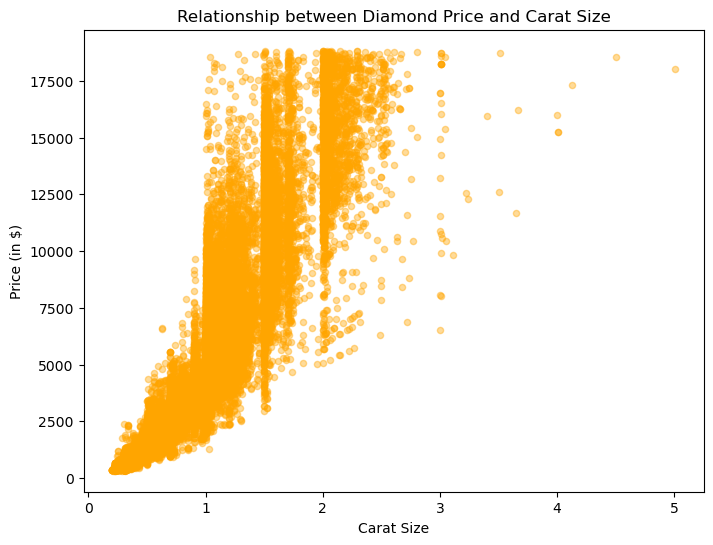

In [15]:
plt.figure(figsize=[8,6])
plt.scatter(diamonds.carat, diamonds.price, alpha=0.4, s=20, 
            color="orange")
plt.xlabel("Carat Size")
plt.ylabel("Price (in $)")
plt.title("Relationship between Diamond Price and Carat Size")
plt.show()

In the next cell we will reproduce the previous chart but colored for clarity.

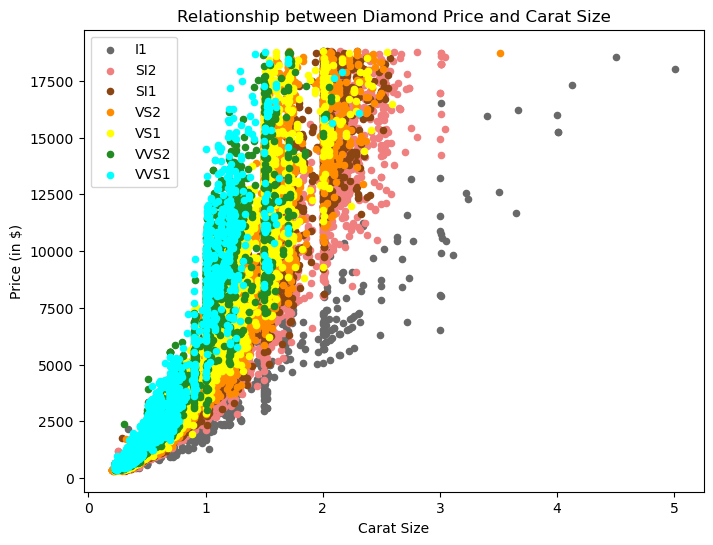

In [16]:
plt.figure(figsize=[8,6])


for i in range(len(clarity_levels)):
    temp_df = diamonds[diamonds["clarity"] == clarity_levels[i]]
    plt.scatter(x=temp_df.carat, y=temp_df.price, s=20, 
                color=clarity_pal[i])
            
plt.xlabel("Carat Size")
plt.ylabel("Price (in $)")
plt.title("Relationship between Diamond Price and Carat Size")
plt.legend(clarity_levels)
plt.show()

We will now see each clarify level in its own separate plot.


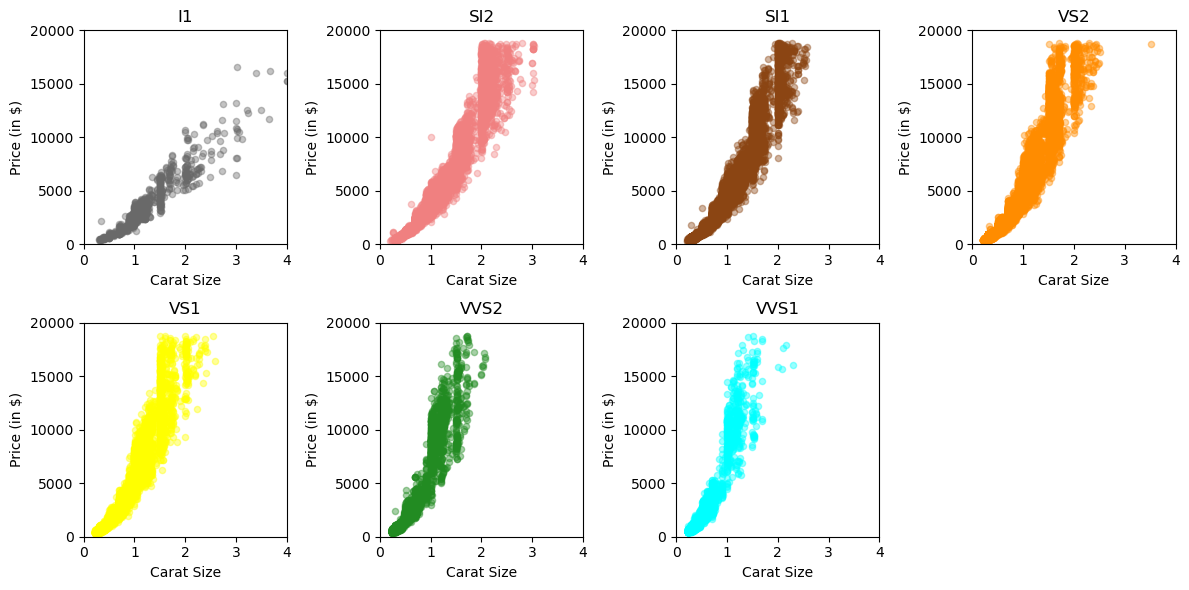

In [17]:
plt.figure(figsize=[12,6])

for i in range(len(clarity_levels)):
    plt.subplot(2, 4, i+1)
    temp_df = diamonds[diamonds["clarity"] == clarity_levels[i]]
    plt.scatter(x=temp_df.carat, y=temp_df.price, alpha=0.4, 
                     s=20, color=clarity_pal[i])
    plt.xlim([0,4])
    plt.ylim([0,20000])
    plt.xlabel("Carat Size")
    plt.ylabel("Price (in $)")
    plt.title(clarity_levels[i])

plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
I will now add two new columns to the diamonds dataset which will hold 
the natural logarithms of the carat and price columns respectively

In [18]:
diamonds.loc[:, "ln_carat"] = np.log(diamonds.loc[:, "carat"])
diamonds.loc[:,"ln_price"] = np.log(diamonds.loc[:, "price"])

diamonds["ln_price"].head(5)

1    5.786897
2    5.786897
3    5.789960
4    5.811141
5    5.814131
Name: ln_price, dtype: float64

In the next cell we will use a histogram to explore the distribution of the diamond prices, and the log of the diamond prices.

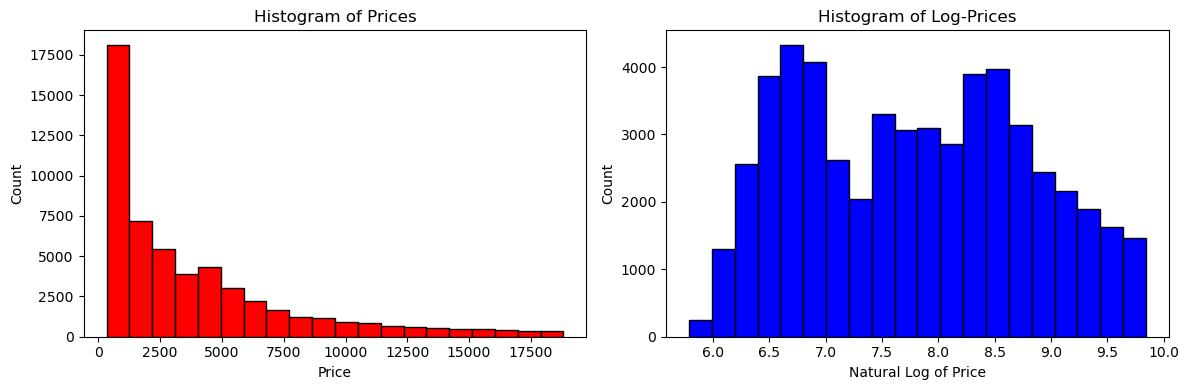

In [19]:
plt.figure(figsize=[12, 4])

# Prices
plt.subplot(1,2,1)
plt.hist(diamonds.loc[:, "price"], bins=20, color="red", 
         edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of Prices")

# Log of Prices
plt.subplot(1, 2, 2)
plt.hist(diamonds.loc[:, "ln_price"], bins=20, color="blue", 
         edgecolor="black")
plt.xlabel("Natural Log of Price")
plt.ylabel("Count")
plt.title("Histogram of Log-Prices")

plt.tight_layout()
plt.show()

In the next cell we will use histograms to explore the distribution of the carat sizes, and the
log of the carat sizes

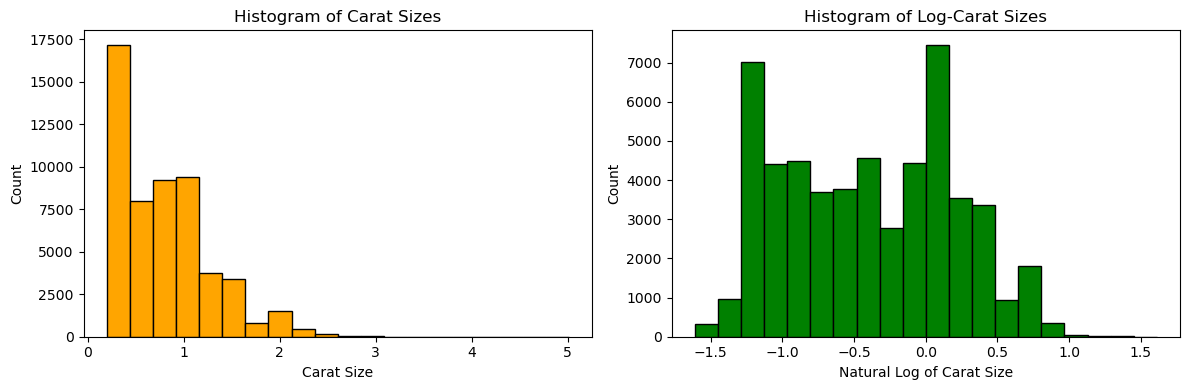

In [20]:
plt.figure(figsize=[12, 4])

# Prices
plt.subplot(1,2,1)
plt.hist(diamonds.loc[:, "carat"], bins=20, color="orange", 
         edgecolor="black")
plt.xlabel("Carat Size")
plt.ylabel("Count")
plt.title("Histogram of Carat Sizes")

# Log of Prices
plt.subplot(1, 2, 2)
plt.hist(diamonds.loc[:, "ln_carat"], bins=20, color="green", 
         edgecolor="black")
plt.xlabel("Natural Log of Carat Size")
plt.ylabel("Count")
plt.title("Histogram of Log-Carat Sizes")

plt.tight_layout()
plt.show()

## Part 7: Scatterplot of Transformed Variables
In the next cell we will see a scatter plot showing the log of price and the log of carat values for our dataset .

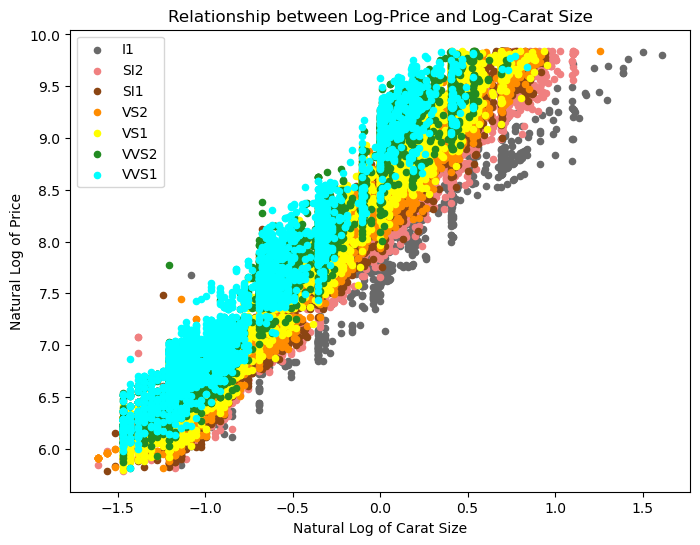

In [21]:
plt.figure(figsize=[8,6])


for i in range(len(clarity_levels)):
    temp_df = diamonds[diamonds["clarity"] == clarity_levels[i]]
    plt.scatter(x=temp_df.ln_carat, y=temp_df.ln_price, s=20, 
                color=clarity_pal[i])
            
plt.xlabel("Natural Log of Carat Size")
plt.ylabel("Natural Log of Price")
plt.title("Relationship between Log-Price and Log-Carat Size")
plt.legend(clarity_levels)
plt.show()

## Part 8: Grouping by Cut
In the next cell I will create a grouped DataFrame displaying the mean price and carat size for each cut level.

In [22]:
gb_cut = diamonds.loc[:, ["cut", "price", "carat"]].\
                    groupby(by="cut", as_index=False).mean()
gb_cut.head()

,cut,price,carat
0,Fair,4358.757764,1.046137
1,Good,3928.864452,0.849185
2,Very Good,3981.759891,0.806381
3,Premium,4584.257704,0.891955
4,Ideal,3457.541970,0.702837


In this cell we will use bar charts to graphically display the information from the DataFrame created above.

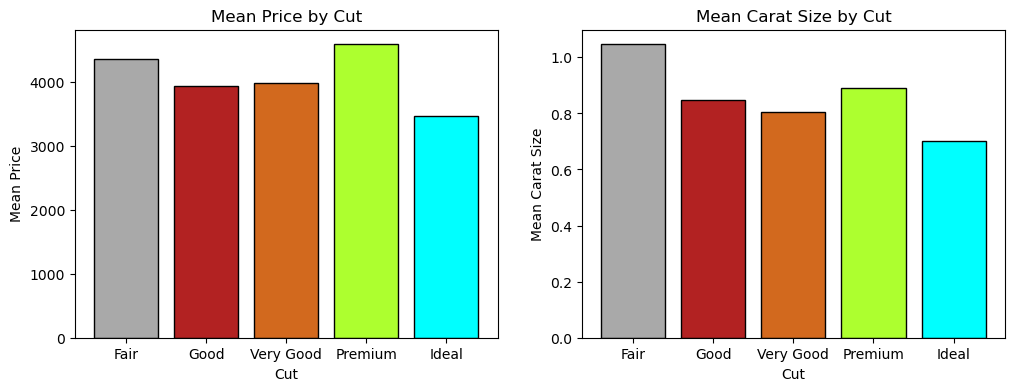

In [23]:
plt.figure(figsize=[12,4])

# Mean Price
plt.subplot(1,2,1)
plt.bar(x=gb_cut.cut, height=gb_cut.price, color=cut_pal, edgecolor="black")
plt.xlabel("Cut")
plt.ylabel("Mean Price")
plt.title("Mean Price by Cut")

# Mean Carat Size
plt.subplot(1,2,2)
plt.bar(x=gb_cut.cut, height=gb_cut.carat, color=cut_pal, edgecolor="black")
plt.xlabel("Cut")
plt.ylabel("Mean Carat Size")
plt.title("Mean Carat Size by Cut")

plt.show()

## Part 9: Grouping by Color
In the next cell I will create a grouped DataFrame displaying the mean price and carat size for each color level.

In [24]:
gb_color = diamonds.loc[:, ["color", "price", "carat"]].\
                    groupby(by="color", as_index=False).mean()
gb_color.head()

,color,price,carat
0,J,5323.818020,1.162137
1,I,5091.874954,1.026927
2,H,4486.669196,0.911799
3,G,3999.135671,0.771190
4,F,3724.886397,0.736538


In the next cell we will now use bar charts to graphically display the information from the DataFrame above.

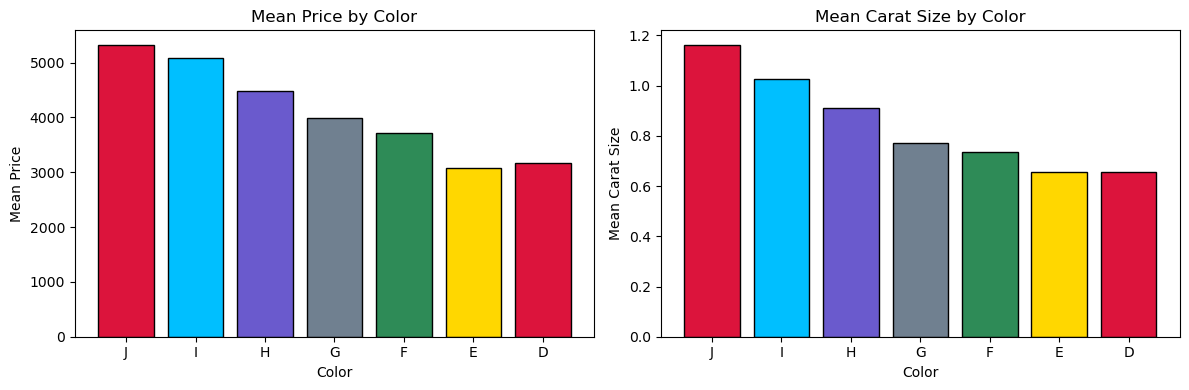

In [25]:
plt.figure(figsize=[12,4])

# Plot Prices
plt.subplot(1,2,1)
plt.bar(x=gb_color.color, height=gb_color.price, color=color_pal, edgecolor="black")
plt.xlabel("Color")
plt.ylabel("Mean Price")
plt.title("Mean Price by Color")

# Plot Carats
plt.subplot(1,2,2)
plt.bar(x=gb_color.color, height=gb_color.carat, color=color_pal, edgecolor="black")
plt.xlabel("Color")
plt.ylabel("Mean Carat Size")
plt.title("Mean Carat Size by Color")

plt.tight_layout()
plt.show()

## Part 10: Grouping by Clarity
In the next cell I will create a grouped DataFrame displaying the mean price and carat size for each clarity level.

In [26]:
gb_clarity = diamonds.loc[:, ["clarity", "price", "carat"]].\
                    groupby(by="clarity", as_index=False).mean()

gb_clarity.head()

,clarity,price,carat
0,I1,3924.168691,1.283846
1,SI2,5063.028606,1.077648
2,SI1,3996.001148,0.850482
3,VS2,3924.989395,0.763935
4,VS1,3839.455391,0.727158


In the next cell I will now use bar charts to graphically display the information from the DataFrame above.

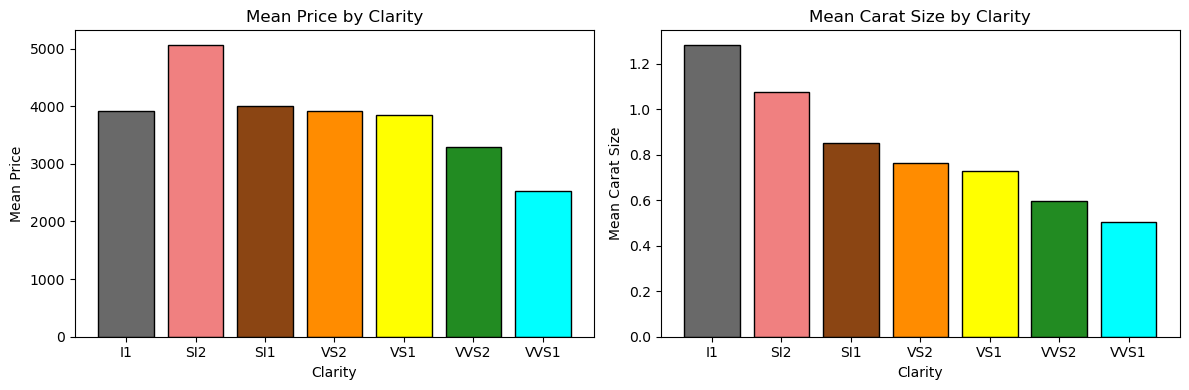

In [27]:
fig, ax = plt.subplots(1,2, figsize=[12, 4])

# Mean Price
ax[0].bar(x=gb_clarity.clarity, height=gb_clarity.price,
               edgecolor="black", color=clarity_pal)
ax[0].set_xlabel("Clarity")
ax[0].set_ylabel("Mean Price")
ax[0].set_title("Mean Price by Clarity")

# Mean Carat Size
ax[1].bar(x=gb_clarity.clarity, height=gb_clarity.carat,
               edgecolor="black", color=clarity_pal)
ax[1].set_xlabel("Clarity")
ax[1].set_ylabel("Mean Carat Size")
ax[1].set_title("Mean Carat Size by Clarity")

plt.tight_layout()
plt.show()